Final Project Submission

Student name: Michael Mathews Jr

Student pace: part time

Scheduled project review date/time: Tuesday, Feb 18, 2020. 4pm EST.

Instructor name: Jacob Eli Thomas

Blog post URL: https://medium.com/@M_84821/analyzing-box-office-success-of-the-film-industry-c42e516f4ee6

## First things first. Import Pandas so I can read my data. Print out the shape, data types and head of the dataframe to get a high level understanding.

In [38]:
import pandas as pd
df = pd.read_excel('movies.xls')
print(df.shape)
print(df.dtypes)
df.head()

(6820, 15)
budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


After some basic discovery, I found some rows included a film with a $0 budget. I first found it in the "War" genre, but it extended to other genres as well.

In [39]:
war_df = df.loc[df['genre']=='War']
war_df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
543,0,A&M; Films,USA,Kevin Reynolds,War,161004,The Beast of War,R,1988-09-07 00:00:00,111,7.4,George Dzundza,7675,William Mastrosimone,1988
631,0,Cannon International,USA,Aaron Norris,War,1348771,Platoon Leader,R,1988-10,97,5.4,Tony Pierce,1193,Andrew Deutsch,1988


I chose to drop all rows where the budget == $0.

In [40]:
df.drop(df[df['budget']==0].index, inplace=True)
print(df.shape)

(4638, 15)


The data is cleaned. I have a smaller data set now but a more valuable one ready to be analyzed. First I created a column for Profit. I also combined genre and rating columns to make it easier to group later on.

In [97]:
df['profit'] = df['gross']-df['budget']
df['genre_rating'] = df['genre']+'_'+df['rating']
print(df.shape)
df.head().sort_values(by=['profit'], ascending=False)

(4638, 17)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,profit,genre_rating
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16 00:00:00,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601,Action_PG
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18 00:00:00,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248,Action_R
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11 00:00:00,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369,Comedy_PG-13
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22 00:00:00,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414,Adventure_R
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01 00:00:00,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613,Adventure_PG


My first grouping was by genre. I sorted by descending average profit and reset the index, making it easier to graph the values.

In [87]:
genre = df.groupby('genre')['profit'].mean().reset_index().sort_values(by=['profit'], ascending=False)
genre

,genre,profit
2,Animation,3.173390e+07
1,Adventure,1.744454e+07
9,Horror,1.614929e+07
4,Comedy,1.188578e+07
11,Mystery,1.023657e+07
13,Sci-Fi,7.846870e+06
3,Biography,7.781799e+06
0,Action,7.182871e+06
8,Fantasy,4.607509e+06
6,Drama,4.297058e+06


I imported MatPlotLib, created the x and y values for a horizontal bar chart, set the axis labels and gave my chart a title. 

In [98]:
import matplotlib.pyplot as plt

In [44]:
genrex = genre['genre']
genrey = genre['profit']

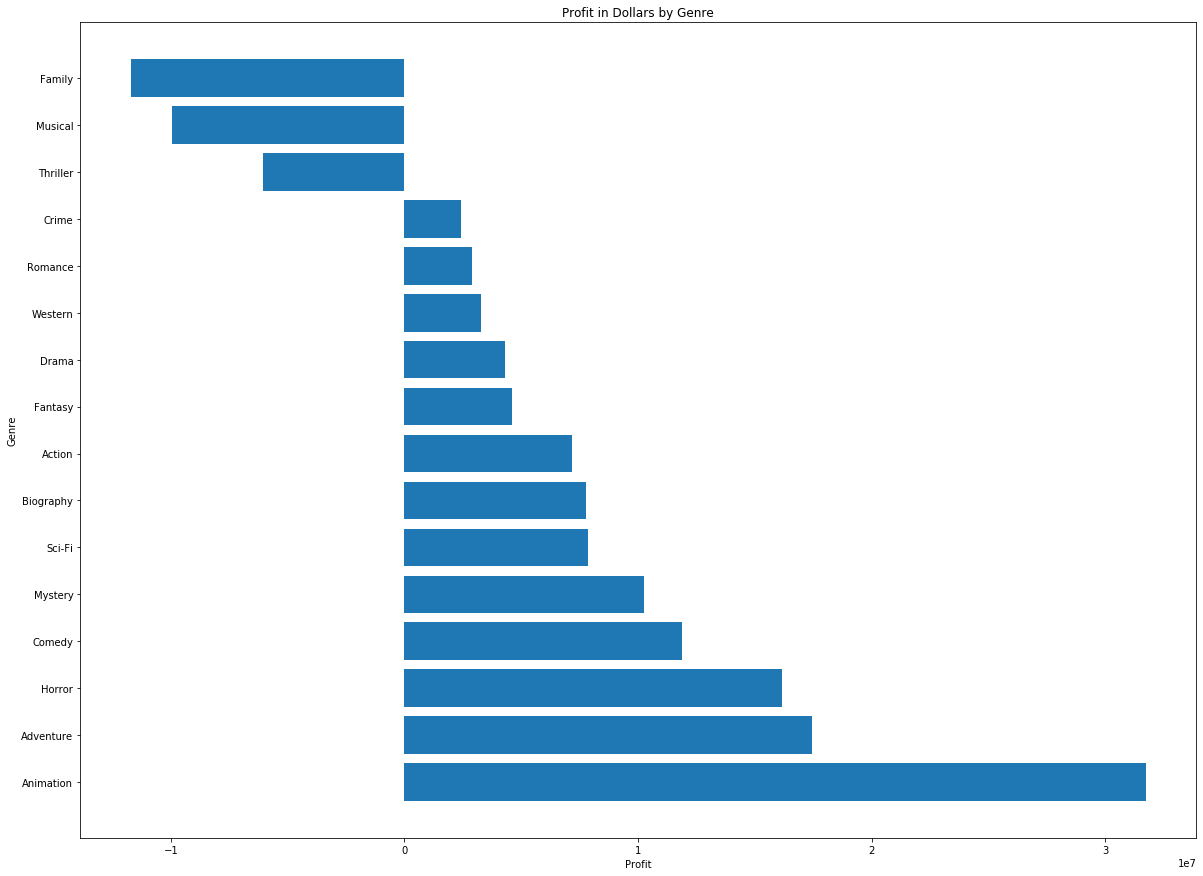

In [103]:
%matplotlib inline
plt.figure(figsize=(20, 15))
plt.barh(genrex, genrey)
plt.xlabel('Profit')
plt.ylabel('Genre')
plt.title('Profit in Dollars by Genre')
plt.show()

I grouped my data by the film's rating. Then charted it in the same way.

In [78]:
rating = df.groupby('rating').mean().sort_values(by=['profit'], ascending=False)
rating.reset_index(inplace=True)

In [22]:
ratingx = rating['rating']
ratingy = rating['profit']

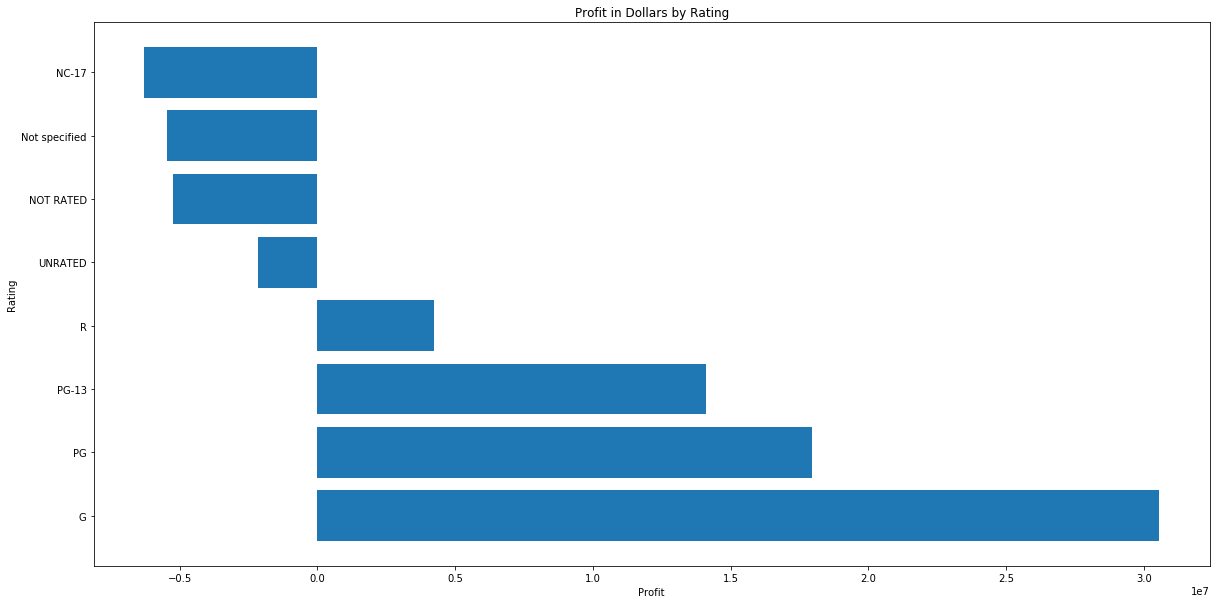

In [23]:
plt.figure(figsize=(20, 10))
plt.barh(ratingx, ratingy)
plt.xlabel('Profit')
plt.ylabel('Rating')
plt.title('Profit in Dollars by Rating')
plt.show()

I combined two data points for my grouping this time. I felt like genre and rating combined gave valuable insight into the average profit of a film. 

In [24]:
genre_rating = df.groupby('genre_rating').mean().sort_values(by=['profit'], ascending=False).reset_index()
genre_rating

,genre_rating,budget,gross,runtime,score,votes,year,profit
0,Adventure_PG-13,6.333488e+07,1.030123e+08,120.906977,6.518605,213054.860465,2003.825581,3.967746e+07
1,Comedy_G,3.488889e+07,7.285712e+07,99.888889,5.688889,51424.222222,2002.222222,3.796823e+07
2,Animation_G,6.466389e+07,1.017021e+08,88.444444,6.751389,137176.875000,2000.527778,3.703823e+07
3,Animation_PG,8.936571e+07,1.224748e+08,93.092857,6.662143,127477.700000,2008.164286,3.310910e+07
4,Sci-Fi_R,1.612500e+07,4.627394e+07,106.750000,7.000000,246494.000000,1999.500000,3.014894e+07
...,...,...,...,...,...,...,...,...
56,Crime_UNRATED,1.262500e+07,6.058370e+05,100.000000,6.650000,8498.000000,1998.500000,-1.201916e+07
57,Animation_PG-13,5.361818e+07,4.107857e+07,94.636364,6.581818,80342.181818,2003.454545,-1.253961e+07
58,Biography_NOT RATED,1.400000e+07,5.817473e+05,121.000000,6.733333,20919.333333,2011.000000,-1.341825e+07
59,Thriller_PG,1.400000e+07,4.598240e+05,101.000000,6.200000,1844.000000,1988.000000,-1.354018e+07


I wrote three lambda functions below. I wanted a count of films that provided an answer to the following questions. I referenced the context of these questions and answers in my blog post.
1. How many films in the data set were rated 'G'?
2. How many films in the data set were both Animated and rated 'G'?
3. How many films in the data set were both Animated and NOT rated 'G'?

In [45]:
G = df.apply(lambda x: True if x['rating'] == 'G' else False, axis=1)
num_rows2 = len(G[G == True].index)
print(num_rows2)

100


In [28]:
Anim_G = df.apply(lambda x: True if x['genre'] == 'Animation' and x['rating'] == 'G' else False, axis=1)
num_rows = len(Anim_G[Anim_G == True].index)
print(num_rows)

72


In [46]:
Anim_NotG = df.apply(lambda x: True if x['genre'] == 'Animation' and x['rating'] != 'G' else False, axis=1)
num_rows3 = len(Anim_NotG[Anim_NotG == True].index)
print(num_rows3)

157


The below chart was my favorite. It provides a powerful visual of the combination of genre/rating and how that combo performs at the box office.

In [29]:
genre_ratingx = genre_rating['genre_rating']
genre_ratingy = genre_rating['profit']

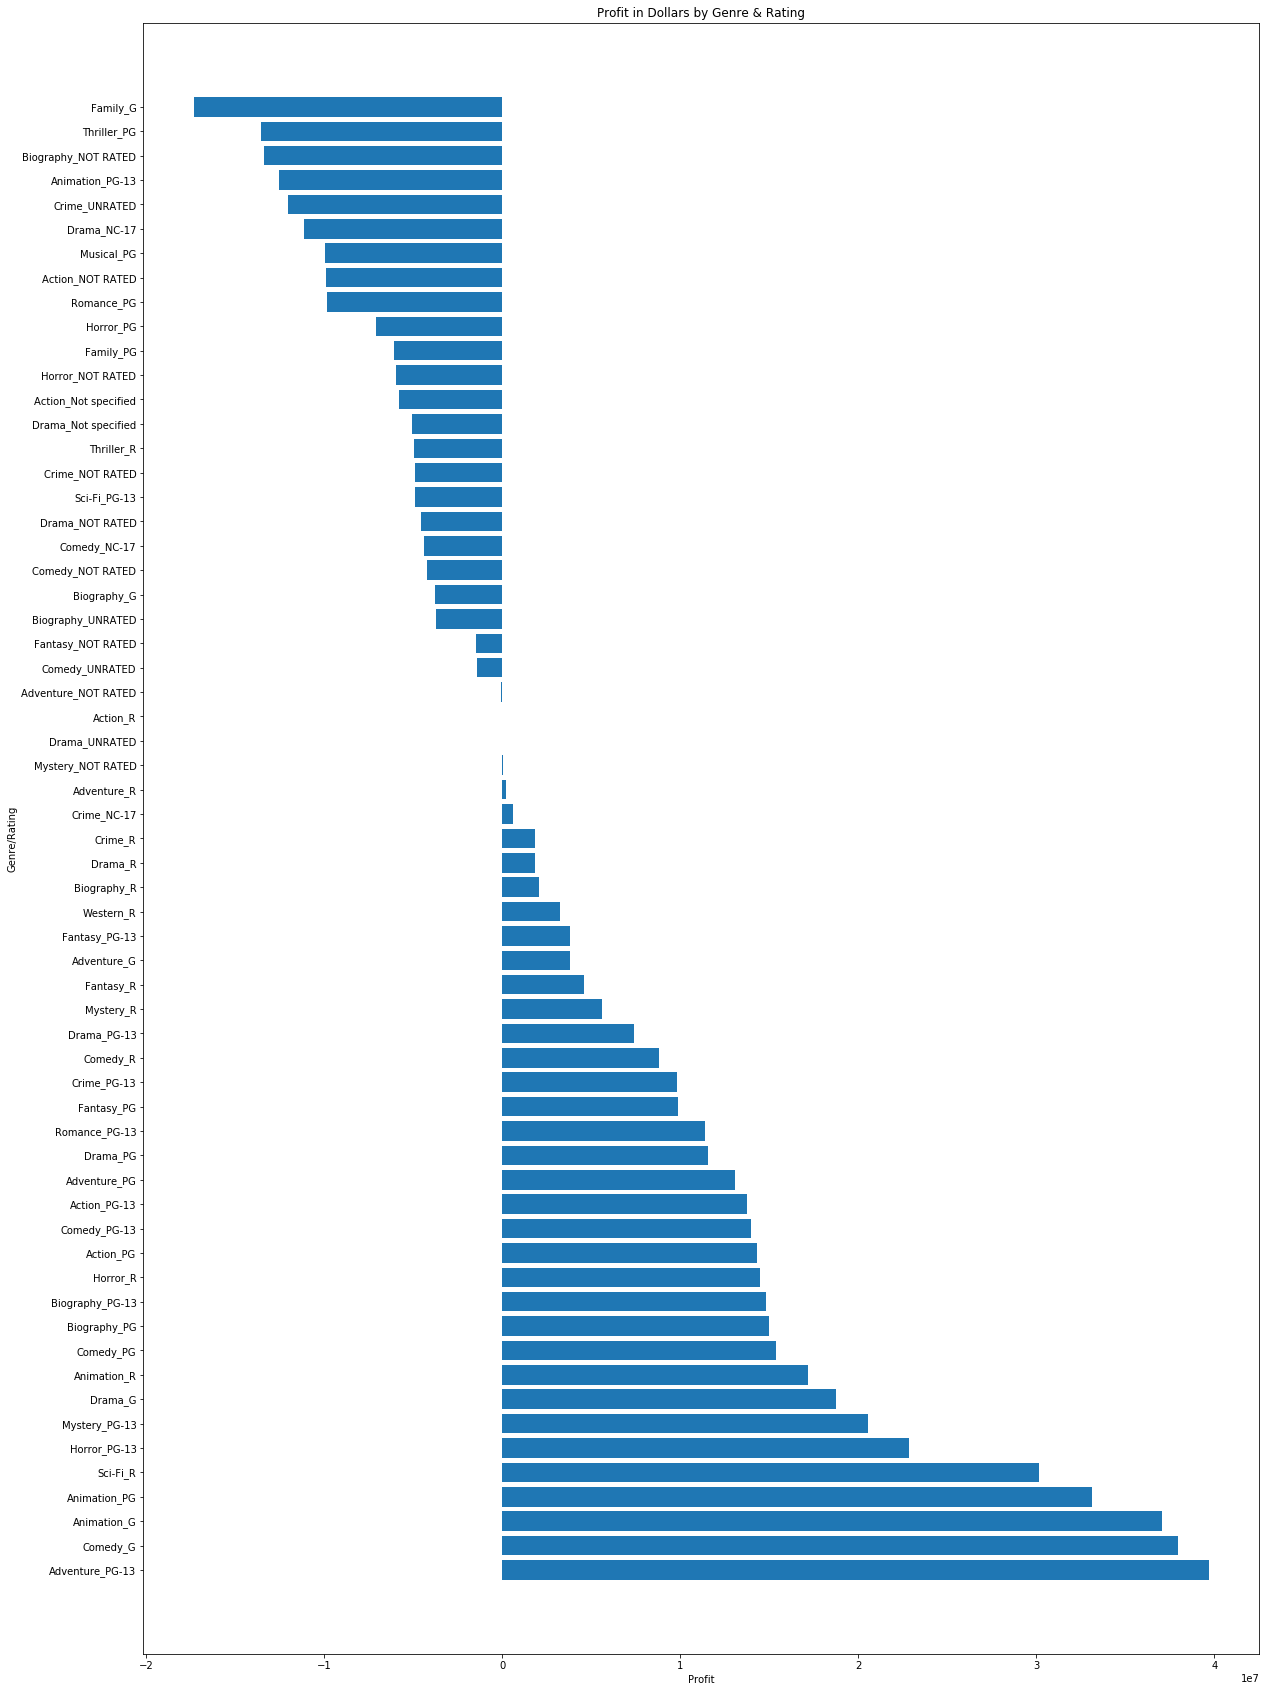

In [30]:
plt.figure(figsize=(20, 30))
plt.barh(genre_ratingx, genre_ratingy)
plt.xlabel('Profit')
plt.ylabel('Genre/Rating')
plt.title('Profit in Dollars by Genre & Rating')
plt.show()

I wanted a quick view of the top 20 writers.

In [31]:
writer = df.groupby('writer').mean().sort_values(by=['profit'], ascending=False).reset_index()
writer = writer.head(20)
writer

,writer,budget,gross,runtime,score,votes,year,profit
0,Benedict Fitzgerald,3.000000e+07,3.707829e+08,127.000000,7.200000,1.890310e+05,2004.0,3.407829e+08
1,Rick Jaffa,1.215000e+08,4.145154e+08,114.500000,7.300000,4.541525e+05,2013.0,2.930154e+08
2,Winston Groom,5.500000e+07,3.302522e+08,142.000000,8.800000,1.402876e+06,1994.0,2.752522e+08
3,Irene Mecchi,4.500000e+07,3.129000e+08,88.000000,8.500000,7.230700e+05,1994.0,2.679000e+08
4,Brian Lynch,7.400000e+07,3.360458e+08,91.000000,6.400000,1.692280e+05,2015.0,2.620458e+08
5,Lawrence Kasdan,9.933333e+07,3.543875e+08,125.666667,7.066667,2.644283e+05,2002.0,2.550542e+08
6,J.R.R. Tolkien,9.366667e+07,3.453140e+08,186.000000,8.800000,1.297096e+06,2002.0,2.516473e+08
7,Jennifer Lee,1.500000e+08,4.007380e+08,102.000000,7.500000,4.641490e+05,2013.0,2.507380e+08
8,Drew Pearce,2.000000e+08,4.090140e+08,130.000000,7.200000,6.053300e+05,2013.0,2.090140e+08
9,Melissa Rosenberg,7.700000e+07,2.724414e+08,121.600000,5.020000,2.372732e+05,2010.0,1.954414e+08


I graphed the top 20 writers in order to vizualize their success.

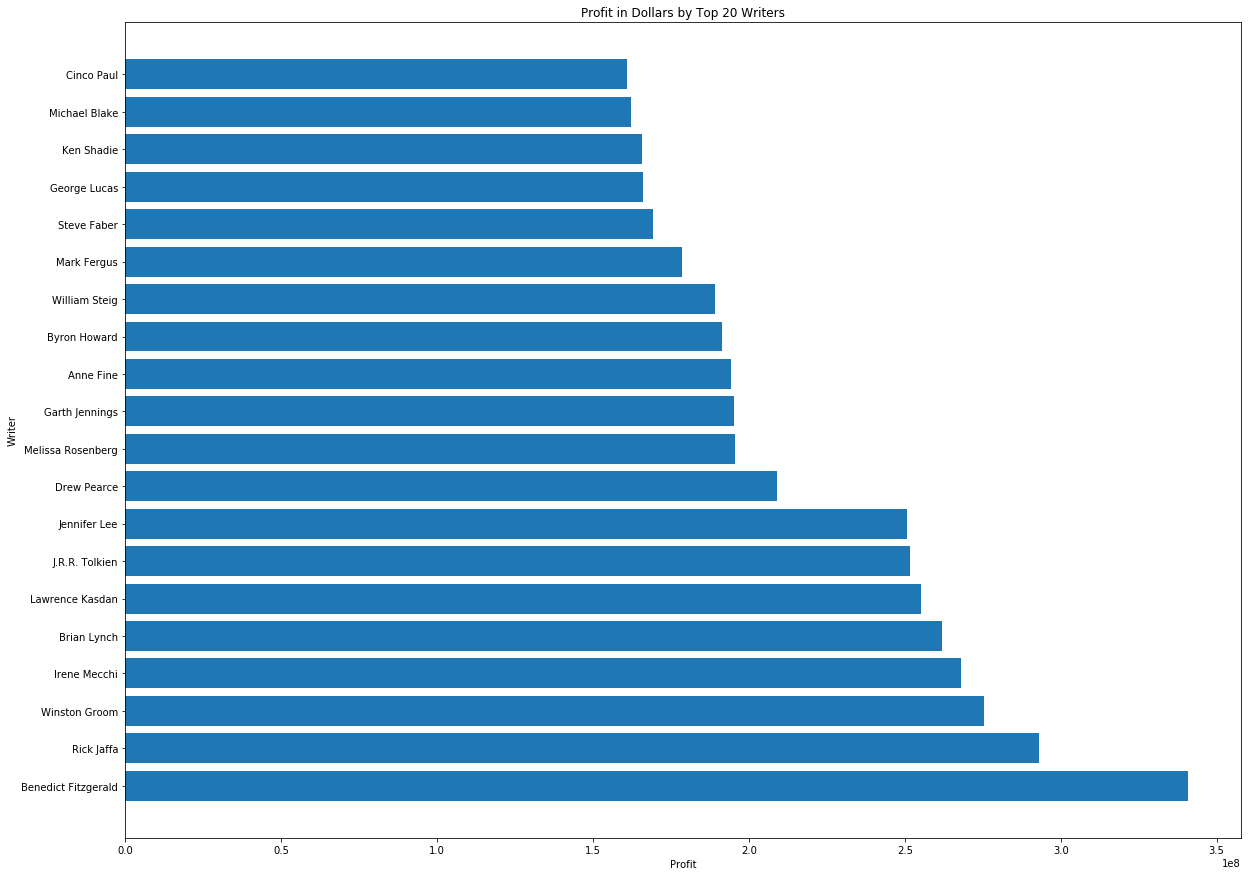

In [102]:
a = writer['writer']
b = writer['profit']

plt.figure(figsize=(20, 15))
plt.barh(a, b)
plt.xlabel('Profit')
plt.ylabel('Writer')
plt.title('Profit in Dollars by Top 20 Writers')
plt.show()

I wanted to view the average budget of each genre and evaluate on how that effects its profit.

In [36]:
genre2 = genre.sort_values(by=['budget'], ascending=False)
genre2

,genre,budget,gross,runtime,score,votes,year,profit
0,Animation,7.781004e+07,1.095439e+08,91.563319,6.698690,127245.943231,2005.585153,3.173390e+07
7,Action,5.921049e+07,6.639336e+07,110.287534,6.149773,132120.315742,2002.754322,7.182871e+06
1,Adventure,5.024821e+07,6.769276e+07,111.577320,6.331959,133144.109966,2002.731959,1.744454e+07
4,Mystery,3.290484e+07,4.314141e+07,109.580645,6.490323,185260.290323,2003.903226,1.023657e+07
6,Biography,2.546938e+07,3.325118e+07,121.016736,7.093724,92612.769874,2005.041841,7.781799e+06
9,Drama,2.415350e+07,2.845056e+07,114.564943,6.724338,84158.136192,2002.718789,4.297058e+06
12,Crime,2.386503e+07,2.629236e+07,112.404494,6.795225,111066.997191,2001.536517,2.427338e+06
3,Comedy,2.369318e+07,3.557896e+07,101.584733,6.123969,60397.266412,2001.374046,1.188578e+07
5,Sci-Fi,1.995455e+07,2.780142e+07,103.090909,6.400000,129478.090909,2001.545455,7.846870e+06
15,Family,1.992167e+07,8.216973e+06,94.166667,5.733333,8387.833333,1994.000000,-1.170469e+07


Again, I visualized this below.

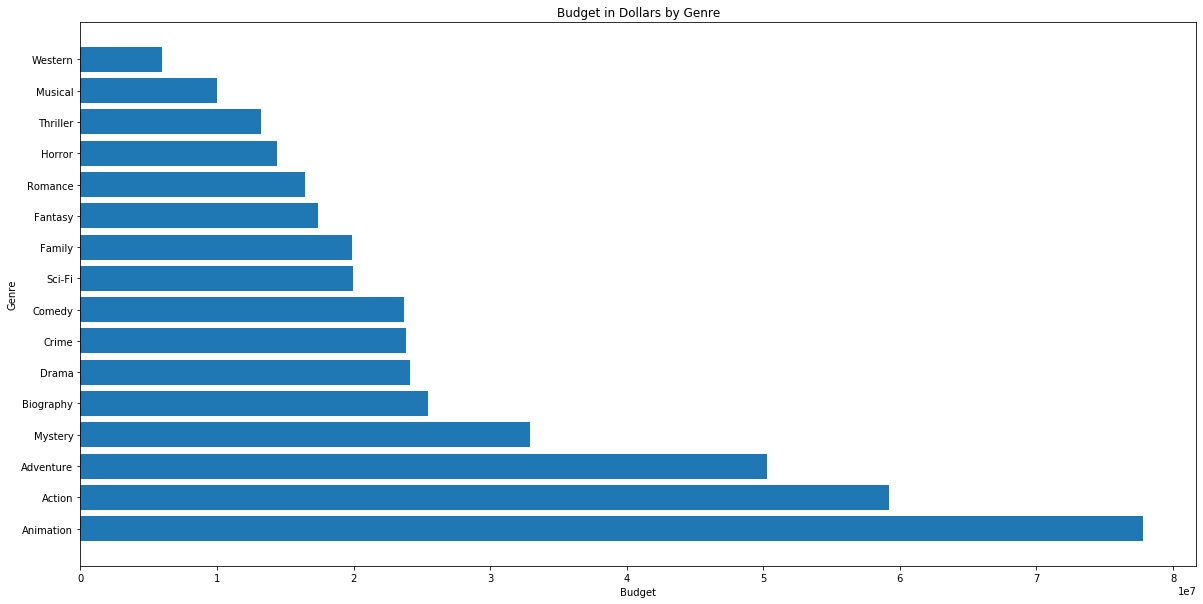

In [37]:
genre2x = genre2['budget']
genre2y = genre2['genre']

plt.figure(figsize=(20, 10))
plt.barh(genre2y, genre2x)
plt.xlabel('Budget')
plt.ylabel('Genre')
plt.title('Budget in Dollars by Genre')
plt.show()

Finally, I wanted to get a look at a 3rd level grouping. This time I included genre/rating/writer. There is 3,879 combinations of these 3 fields which is 84% of the entire data set. So not incredibly valuable information but interesting nonetheless. 

In [101]:
gen_rat_writ = df.groupby(['genre', 'rating', 'writer']).mean().sort_values(by=['profit'], ascending=False).reset_index()
print(gen_rat_writ.shape)
gen_rat_writ = gen_rat_writ.head(20)
gen_rat_writ

(3879, 10)


,genre,rating,writer,budget,gross,runtime,score,votes,year,profit
0,Action,PG-13,Lawrence Kasdan,2.450000e+08,9.366622e+08,136.0,8.1,6.871920e+05,2015.0,691662225.0
1,Action,PG-13,James Cameron,2.370000e+08,7.605076e+08,162.0,7.8,9.544120e+05,2009.0,523507625.0
2,Drama,PG-13,James Cameron,2.000000e+08,6.586723e+08,194.0,7.8,8.625540e+05,1997.0,458672302.0
3,Drama,R,Benedict Fitzgerald,3.000000e+07,3.707829e+08,127.0,7.2,1.890310e+05,2004.0,340782930.0
4,Adventure,PG-13,Michael Crichton,6.300000e+07,4.024539e+08,127.0,8.1,6.852700e+05,1993.0,339453882.0
5,Action,PG-13,Chris Weitz,2.000000e+08,5.321773e+08,133.0,7.9,3.654730e+05,2016.0,332177324.0
6,Adventure,PG-13,Gary Ross,7.800000e+07,4.080107e+08,142.0,7.2,7.485810e+05,2012.0,330010692.0
7,Action,R,Rhett Reese,5.800000e+07,3.630707e+08,108.0,8.0,6.686250e+05,2016.0,305070709.0
8,Action,PG-13,Simon Beaufoy,1.300000e+08,4.246680e+08,146.0,7.6,5.359630e+05,2013.0,294668047.0
9,Action,PG-13,Rick Jaffa,1.215000e+08,4.145154e+08,114.5,7.3,4.541525e+05,2013.0,293015405.0


The final bar chart below. I want Lawrence Kasdan, James Cameron and/or Benedict Fitzgerald writing my movies.

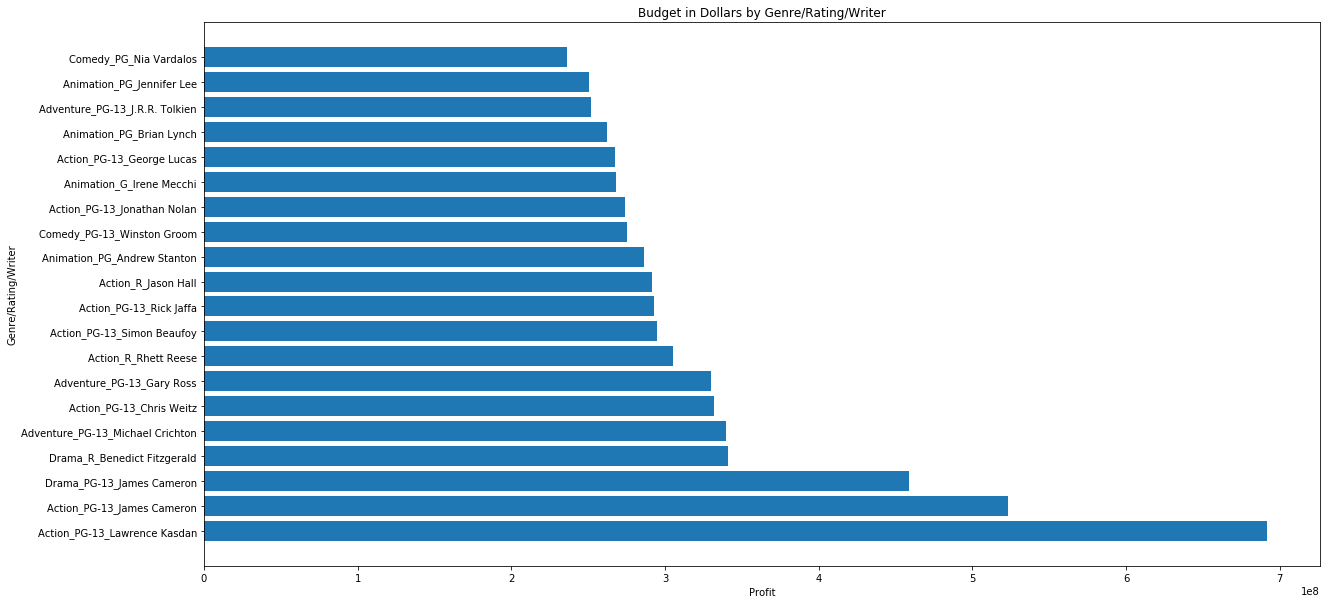

In [95]:
gen_rat_writ['Gen/Rat/Writ'] = gen_rat_writ['genre']+'_'+gen_rat_writ['rating']+'_'+gen_rat_writ['writer']
xx = gen_rat_writ['Gen/Rat/Writ']
yy = gen_rat_writ['profit']

plt.figure(figsize=(20, 10))
plt.barh(xx, yy)
plt.xlabel('Profit')
plt.ylabel('Genre/Rating/Writer')
plt.title('Budget in Dollars by Genre/Rating/Writer')
plt.show()